In [2]:
import tweepy
import pandas as pd
import numpy as np

## Coleta de dados

In [3]:
# credenciais de autenticaçãoc
consumer_API_Key ="HNOrCXXZhTE3FCWOolQyP0Nos"
consumer_API_secret_key = "u715txI4xfxzl1tY1JwsOJDhbRqT6s7kEGUmZodgRnUfM0oDnB"
access_token = "236964618-wpro3lqcmBpfTI0ZxIWLhPTCW41WeGzGDTmrB7Vi"
access_token_secret = "nxDh1g4dYAt6XvHZWBUvD9TolJThaWauhrqtjrsBesnBv"

In [4]:
# autenticação na API
auth = tweepy.OAuthHandler(consumer_API_Key,consumer_API_secret_key)
auth.set_access_token(access_token,access_token_secret)
token = tweepy.API(auth)

In [5]:
#Construindo a instancia da API - 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,
                 retry_count=5, retry_delay=10)

In [ ]:
api.update_status('This tweet is an example. It\'s showing how to tweet via API.\
I\'m using it during my work in BootCamp of Data Scientist by IGTI. \n #igti #datascience')

In [59]:
#Definir que palavras (keyword) que deseja pesquisar no Twitter

keyword = ('data scientist OR data science OR big data OR machine learning')
#keyword = ('#homeoffice OR #trabalhoremoto')
# keyword = ('home office OR trabalho remoto OR homeoffice OR trabalhoremoto OR #homeoffice')
# keyword = ('covid-19 OR covid OR coronavirus OR pandemic')

In [7]:
# Fazer a busca por palavra chave
# result_type --> mixed(default), recent, popular
# tweets --> variável que irá armazenar todos os tweets  com a palavra escolhida
# tweets = token.search(q=keyword, count=1000, result_type="popular", tweet_mode='extended', lang='pt')

In [31]:
info2 = []
tweets2 = []
for tweet in tweepy.Cursor(api.search,
                           q=keyword, tweet_mode='extended',
                           rpp=1000, result_type="mixed",lang='en',
                           include_entitiews=True).items(3000):
    
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
    
    newtweet = aux.replace("\n"," ")
    
    tweets.append(newtweet)
    info2.append(tweet)
    file = open("tweets_homeoffice_pt.txt","a", -1,"utf-8")
    file.write(newtweet+'\n')
    file.close()
    

In [10]:
print(F'Total de tweets coletados foram {len(tweets3)}')  #covid en

Total de tweets coletados foram 2000


In [12]:
print(F'Total de tweets coletados foram {len(info)}')  #covid en

Total de tweets coletados foram 2000


In [15]:
print(F'Total de tweets coletados foram {len(tweets)}')  #big data en

Total de tweets coletados foram 2641


In [16]:
print(F'Total de tweets coletados foram {len(info1)}')  #big data en

Total de tweets coletados foram 2641


In [32]:
print(F'Total de tweets coletados foram {len(info2)}')  #homeoffice en

Total de tweets coletados foram 718


In [34]:
print(info[0])

Status(_api=<tweepy.api.API object at 0x7f23cf760f40>, _json={'created_at': 'Fri Aug 07 15:04:22 +0000 2020', 'id': 1291752049831485442, 'id_str': '1291752049831485442', 'text': '2,000 people died from Covid in the U.S. yesterday. \n\nTwo. Thousand.\n\nAnd today, the president of the United States… https://t.co/MWnZPFdEw6', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MWnZPFdEw6', 'expanded_url': 'https://twitter.com/i/web/status/1291752049831485442', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 130557513, 'id_str': '130557513', 'name': 'Mehdi Hasan', 'scree

## Análise exploratória dos tweets

In [18]:
#criando dataframe sobre BigData
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

tweets_df['len']= np.array([len(tweet) for tweet in tweets])
tweets_df['ID']= np.array([tweet.id for tweet in info1])
tweets_df['USER']= np.array([tweet.user.screen_name for tweet in info1])
tweets_df['useName']= np.array([tweet.user.name for tweet in info1])
tweets_df['User Location']= np.array([tweet.user.location for tweet in info1])
tweets_df['Language']=np.array([tweet.user.lang for tweet in info1])
tweets_df['Date']=np.array([tweet.created_at for tweet in info1])
tweets_df['Source']=np.array([tweet.source for tweet in info1])
tweets_df['Likes']=np.array([tweet.favorite_count for tweet in info1])
tweets_df['Retweets']=np.array([tweet.retweet_count for tweet in info1])
tweets_df['Geo']=np.array([tweet.geo for tweet in info1])
tweets_df['Coordinates']=np.array([tweet.coordinates for tweet in info1])
tweets_df['Place']=np.array([tweet.place for tweet in info1])

tweets_df.to_csv("tweets_mixed_big_data.csv")

In [113]:
tweets_df[tweets_df['User Location'] != ''].head(10)

Tweets  len  \
0   [UPDATED this year] Free PDF #DataScience Chea...  137   
5   #DataScience offers inferential thinking, comp...  144   
6   The 5 Components Towards Building Production-R...  140   
7   Big Data Processing and Machine Learning with ...  104   
8   This week I decided to take a course from Univ...  140   
9   Global Big Data Conference #DeepLearning #lear...   92   
11  Decided to go back to a Udemy course I bought ...  140   
12  #FEATURED #COURSES The #Data #Science Course 2...  137   
13  Decided to go back to a Udemy course I bought ...  140   
15  If you're interested in data science, machine ...  144   

                     ID             USER  \
0   1291742991992999937       KirkDBorne   
5   1292161581262962691         brunadl_   
6   1292161572018806787      AndyHorvitz   
7   1292161488283668483         Mr_Cee95   
8   1292161106597814279       thelizzle_   
9   1292160918839799809    Cyril_Chiffot   
11  1292160699582611457  blackpeopledata   
12  1292160592309104640          byLilyV   
13  1292160140305674242        BlkHwk0ps   
15  1290740041581572098     stigmarelius   

                                   useName            User Location Language  \
0                               Kirk Borne            Maryland, USA     None   
5                          Bruna Lanzarini        São Paulo, Brasil     None   
6                             Andy Horvitz            Massachusetts     None   
7                                   Kwesi🐬        Cape Coast, Ghana     None   
8                               Thelma_x🇬🇭               Right here     None   
9                            Cyril Chiffot      Zürich, Switzerland     None   
11                       Black People Data                   Global     None   
12             Lily's Education4you.online      Bradford, Yorkshire     None   
13  Coding for a better world. ¿Need help?  Just were I have to be.     None   
15                   Flawlessly logical 🖖🏾              Chicago, IL     None   

                  Date               Source  Likes  Retweets   Geo  \
0  2020-08-07 14:28:23   Twitter for iPhone    324       153  None   
5  2020-08-08 18:11:42      Twitter Web App      0         4  None   
6  2020-08-08 18:11:40               AMH-RT      0         2  None   
7  2020-08-08 18:11:20  Twitter for Android      0        10  None   
8  2020-08-08 18:09:49   Twitter for iPhone      0         1  None   
9  2020-08-08 18:09:04            TwinyBots      0         1  None   
11 2020-08-08 18:08:12         datareadinfo      0         3  None   
12 2020-08-08 18:07:47       SocialPilot.co      1         1  None   
13 2020-08-08 18:05:59          Pachamama_X      0         3  None   
15 2020-08-04 20:03:01  Twitter for Android      0       136  None   

   Coordinates Place  
0         None  None  
5         None  None  
6         None  None  
7         None  None  
8         None  None  
9         None  None  
11        None  None  
12        None  None  
13        None  None  
15        None  None

In [35]:
# Tweets com maior numero de LIkes
likes_max = np.max(tweets_df['Likes']) # funçao max do numpy identifica o valor maximo
likes_min = np.min(tweets_df['Likes']) # função min do numpy identifica o valor minimo

likes = tweets_df[tweets_df['Likes'] == likes_max] # pega o primeiro tweet com valor maximo

print(f"O tweet com mais curtidas (likes) é: \n{likes}")
print(f"Numero de curtidas: {likes_max}")
print(f'O menor número de curtida: {likes_min}')

O tweet com mais curtidas (likes) é: 
                                                Tweets  len  \
110  If you're interested in data science, machine ...  144   

                      ID          USER           useName  \
110  1290724436082130944  freeCodeCamp  freeCodeCamp.org   

                     User Location Language                Date  Source  \
110  Just here on Earth... for now     None 2020-08-04 19:01:00  Buffer   

     Likes  Retweets   Geo Coordinates Place  
110    458       136  None        None  None  
Numero de curtidas: 458
O menor número de curtida: 0


In [36]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta tweets possuem o mesmo valor maximo
print(np.sum(tweets_df['Likes'] == likes_min)) #conta tweets possuem o mesmo valor maximo

1
2272


In [37]:
# Tweets com maior numero de retweets
retweet_max = np.max(tweets_df['Retweets']) # funçao max do numpy identifica o valor maximo

retweet = tweets_df[tweets_df['Retweets'] == retweet_max] # pega o primeiro tweet com valor maximo

print(f"o tweet com mais recurtidas (retweets) é: \n{retweet}")
print(f"Numero de recurtidas: {retweet_max}")

o tweet com mais recurtidas (retweets) é: 
                                                 Tweets  len  \
1456  Springer just made 400+ textbooks free to down...  144   
1457  Springer just made 400+ textbooks free to down...  144   
1459  Springer just made 400+ textbooks free to down...  144   
1846  Springer just made 400+ textbooks free to down...  144   
1849  Springer just made 400+ textbooks free to down...  144   
1850  Springer just made 400+ textbooks free to down...  144   
1867  Springer just made 400+ textbooks free to down...  144   
1868  Springer just made 400+ textbooks free to down...  144   
1901  Springer just made 400+ textbooks free to down...  144   
1902  Springer just made 400+ textbooks free to down...  144   
1903  Springer just made 400+ textbooks free to down...  144   

                       ID           USER  \
1456  1290359725176086537       bexxmodd   
1457  1290359724362391553     HarryHSolo   
1459  1290359702509903872        URRao10   
1846  129027

In [38]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta tweets possuem o mesmo valor maximo

11


## Identifica a fonte(origem) do tweet

In [39]:
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) # inclui somente se não existir
    
percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

In [40]:
sourceDF = pd.DataFrame({'source':percent},index=sources)
sourceDF

source
Twitter for iPhone           213.0
Buffer                        30.0
Hootsuite Inc.                30.0
Python Data Science Tweets    77.0
Twitter Web App              380.0
...                            ...
Postings.com                   1.0
retweet_selectively            1.0
Copernical connector           1.0
SOCIAL CRIME CELL              2.0
Digitalbit Desk                1.0

[201 rows x 1 columns]

In [41]:
import matplotlib.pyplot as plt

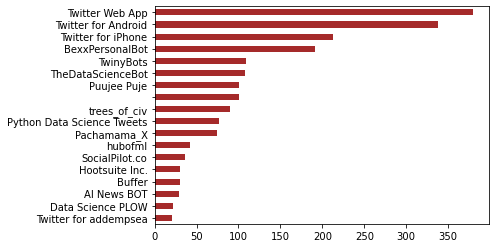

In [52]:
sources_sorted = sourceDF.loc[sourceDF['source'] > 20].sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#a52a2a')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

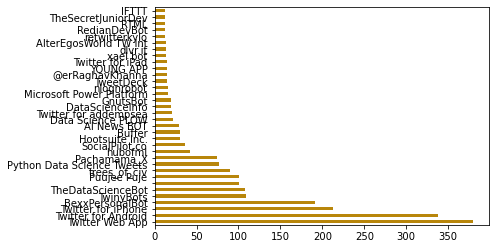

In [51]:
sources_sorted = sourceDF.loc[sourceDF['source'] > 10].sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#b8860b')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Identifica o volume de tweets por dia

## Análise de Polaridade

In [55]:
from textblob import TextBlob as tb

In [53]:
# Lista vazia para armazenar as polaridades
polarities =[]

In [56]:
for tweet in tweets_df['Tweets']: #para cada tweet
    
    polarities.append(tb(tweet).sentiment.polarity) #analisa a polaridade

In [58]:
print(polarities)

[0.4, 0.27142857142857146, 0.0, 0.1, 0.0, 0.3625, 0.0, 0.0, -0.125, 0.0, -0.125, 0.0, 0.1, 0.0, 0.0, 0.25, 0.1, -0.05, 0.1, 0.25, 0.15, 0.4, 0.4, 0.25, 0.55, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.25, 0.0, -0.08333333333333333, 0.4, 0.35, 0.35, 0.0, 0.35, 0.0, 0.0, 0.4, 0.4, 0.05, 0.35, 0.4, 0.1, 0.1, 0.25, 0.4, 0.25, 0.4, 0.25, 0.4, 0.4, 0.4, 0.4, 0.1, 0.55, 0.55, 0.0, -0.08333333333333333, 0.1, 0.1, 0.1, -0.08333333333333333, -0.08333333333333333, -0.08333333333333333, 0.25, 0.4, 0.4, 0.4, 0.25, 0.0, 0.25, 0.25, -0.13333333333333333, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.53125, 0.25, 0.25, 0.25, 0.0, 0.4, 0.4, 0.25, 0.4, 0.06818181818181818, 0.25, 0.06818181818181818, 0.0, 0.4, 0.0, 0.25, 0.25, 0.25, 0.0, 0.4, 0.0, -0.08333333333333333, -0.08333333333333333, 0.4, 0.4, 0.0, 0.4, 0.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08333333333333333, -0.08333333333333333, 0.0, 0.32500000000000007, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.325000000

In [64]:
print(f'Para a keyword utilizada: {keyword.upper()}')
print(f'A média de sentimento utilizando o TextBlob foi de {np.mean(polarities)}')

Para a keyword utilizada: DATA SCIENTIST OR DATA SCIENCE OR BIG DATA OR MACHINE LEARNING
A média de sentimento utilizando o TextBlob foi de 0.10868303511667768


In [65]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive += 1
    elif polarity < 0:
        negative += 1
    else:
        neutral += 1

print(f"Tweets Positivos: {positive}")
print(f"Tweets Negativos: {negative}")
print(f"Tweets Neutros: {neutral}")

#Calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

Tweets Positivos: 1142
Tweets Negativos: 178
Tweets Neutros: 1321


In [68]:
#Define variaveis
sentiments =['Positivos','Negativos','Neutros']
percents =[pos_pct,neg_pct,neu_pct]
percents

[43.241196516471035, 6.739871260886028, 50.01893222264294]

In [70]:
pie_chart = pd.Series(percents,index=sentiments,name='')
pie_chart

Positivos    43.241197
Negativos     6.739871
Neutros      50.018932
Name: , dtype: float64

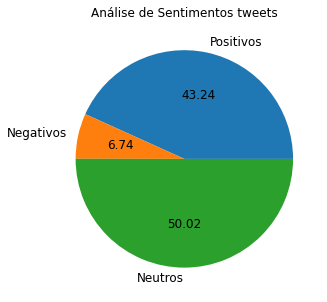

In [71]:
# Gerar (plotar) o grafico de pissa (torta)
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5,5), labels=pie_chart.index, 
                   title="Análise de Sentimentos tweets");

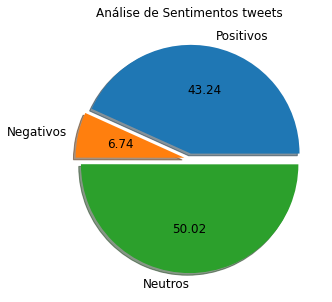

In [74]:
# Gerar (plotar) o grafico de pissa (torta)
explode = (0.05,0.05,0.05) # separa o primeiro indexe

pie_chart.plot.pie(fontsize=12, explode=explode,autopct='%.2f', shadow=True,
                   figsize=(5,5), labels=pie_chart.index, 
                   title="Análise de Sentimentos tweets");

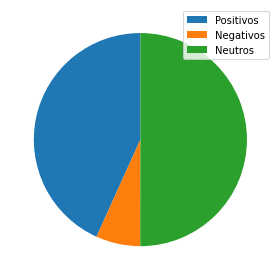

In [75]:
# Usando pacote MatplotLib

patches,text = plt.pie(percents,startangle=90)
plt.legend(patches, sentiments, loc="best")
plt.tight_layout()
plt.show()

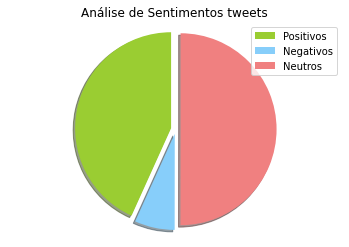

In [87]:
# Usando pacote Matpltolib 2
colors =['yellowgreen','lightskyblue','lightcoral'] # personaliza as cores
explode = (0.05,0.05,0.05) # separa o primeiro indexe

patches,text = plt.pie(percents,explode=explode, shadow=True, colors=colors,startangle=90)
plt.legend(sentiments, loc="best")
plt.axis('equal')
plt.title('Análise de Sentimentos tweets')
plt.show()

In [135]:
#Trabalhando com mapas
from geopy.geocoders import Nominatim
import folium

In [114]:
locator = Nominatim(user_agent ="TweeterSentiments")
exemplo = locator.geocode("Maryland, USA")

In [115]:
print(exemplo)
print(exemplo.latitude)
print(exemplo.longitude)

Maryland, United States of America
39.5162234
-76.9382069


In [129]:
geolocator = Nominatim(user_agent="TweeterSentiments")

#Lista para armazenar a latitude e longitude
latitude=[]
longitude=[]

for user_location in tweets_df[tweets_df['User Location'] != '']['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [136]:
coordenates = np.column_stack((latitude,longitude))

mape = folium.Map(zoom_start=3.)
mape.add_child(plugins.HeatMap(coordenates))
mape.save('Mapa_calor_Big_Data.html')
mape

## Nuvens de Palavras

In [137]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [138]:
words = ' '.join(tweets_df['Tweets'])
words_clean = ' '.join([word for word in words.split()
                       if 'https' not in word
                       and not word.startswith('@')
                       and not word.startswith('#')
                       and word != 'RT'])

In [144]:
type(words_clean)

str

In [139]:
import warnings

In [140]:
warnings.simplefilter('ignore')

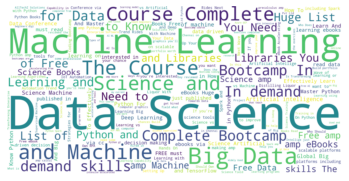

In [157]:
wc = WordCloud(min_font_size=10,
              max_font_size=300,
              background_color='white',
              mode='RGB',
              width=2000,
              height=1000,
              normalize_plurals=True).generate(words_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_with_stopwords.png', dpi=300)
plt.show()

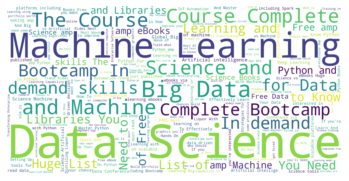

In [158]:
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords = stopwords,
               min_font_size=10,
               max_font_size=300,
               background_color='white',
               mode='RGB',
               width=2000,
               height=1000,
               normalize_plurals=True).generate(words_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_withou_stopwords_wordcloud.png', dpi=300)
plt.show()


In [147]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [152]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [155]:
stop_words = set(stopwords.words('english'))
word_tokens  = word_tokenize(words_clean)
filtered_words = [w for w in word_tokens if not w in stop_words]
all_tweets = TreebankWordDetokenizer().detokenize(filtered_words)

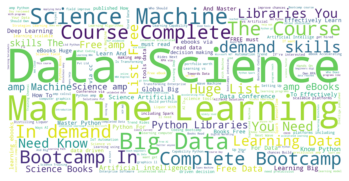

In [196]:
wc = WordCloud(min_font_size=10,
               max_font_size=300,
               background_color='white',
               mode='RGB',
               width=2000,
               height=1000,
               normalize_plurals=True).generate(all_tweets)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_withou_stopwords_nltk.png', dpi=300)
plt.show()



In [198]:
brain_mask = np.array(Image.open('brain_mask2.png'))

In [199]:
brain_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [208]:
def transform_format(val):
    if np.any(val == 255):
        return 0
    else:
        return val

In [209]:
transformed_brain_mask = np.ndarray((brain_mask.shape[0], brain_mask.shape[1]), np.int32)

In [210]:
for i in range(len(brain_mask)):
    transformed_brain_mask[i] = list(map(transform_format, brain_mask[i]))

ValueError: setting an array element with a sequence.

In [ ]:
wc = WordCloud(min_font_size=10,
               max_font_size=300,
               masx_words=1000,
               mask=transformed_brain_mask,
               background_color='white',
               mode='RGB',
               width=2000,
               height=1000,
               normalize_plurals=True).generate(words_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_withou_stopwords_wordcloud.png', dpi=300)
plt.show()